#  Extracting  nc file


In [1]:
import xarray as xr
## pip install xarray and netcdf4 if needed(xarray doesn't import  properly)

%matplotlib inline
# the line above is necessary for getting 
# your plot embedded within the notebook

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

/Library/Python/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Library/Python/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
##  Data from  https://www.epa.gov/ghgemissions/gridded-2012-methane-emissions#data
!ls data/gridded-methane-data

GEPA_Annual.nc  GEPA_Daily.nc   GEPA_Monthly.nc


In [3]:
fn = "data/gridded-methane-data/GEPA_Annual.nc"
annual_dset = xr.open_dataset(fn)


monthlyfn = "data/gridded-methane-data/GEPA_Monthly.nc"
monthly_dset = xr.open_dataset(monthlyfn)


dailyfn = "data/gridded-methane-data/GEPA_Daily.nc"
daily_dset = xr.open_dataset(dailyfn)

In [4]:
print(annual_dset)
# print(daily_dset)
# print(monthly_dset)

<xarray.Dataset>
Dimensions:                                       (lat: 350, lon: 700)
Coordinates:
  * lat                                           (lat) float32 20.05 ... 54....
  * lon                                           (lon) float32 -129.95 ... -...
Data variables:
    emissions_1A_Combustion_Mobile                (lat, lon) float32 ...
    emissions_1A_Combustion_Stationary            (lat, lon) float32 ...
    emissions_1B1a_Coal_Mining_Underground        (lat, lon) float32 ...
    emissions_1B1a_Coal_Mining_Surface            (lat, lon) float32 ...
    emissions_1B1a_Abandoned_Coal                 (lat, lon) float32 ...
    emissions_1B2a_Petroleum                      (lat, lon) float32 ...
    emissions_1B2b_Natural_Gas_Production         (lat, lon) float32 ...
    emissions_1B2b_Natural_Gas_Processing         (lat, lon) float32 ...
    emissions_1B2b_Natural_Gas_Transmission       (lat, lon) float32 ...
    emissions_1B2b_Natural_Gas_Distribution       (lat, lon) flo

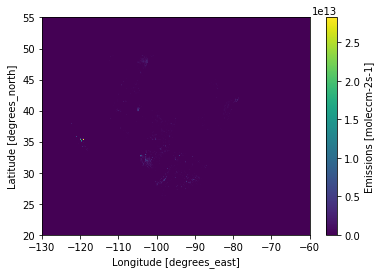

In [5]:
annual_dset['emissions_1B2a_Petroleum'].plot()

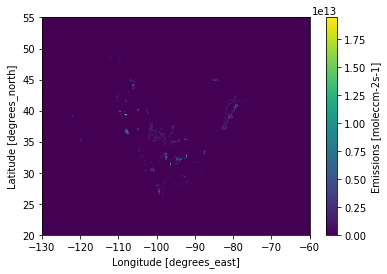

In [6]:
annual_dset['emissions_1B2b_Natural_Gas_Production'].plot()

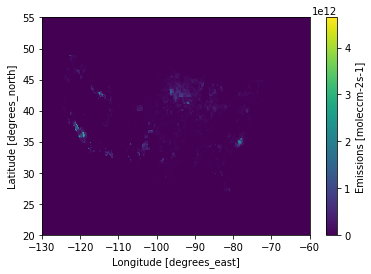

In [7]:
annual_dset['emissions_4B_Manure_Management'].plot()

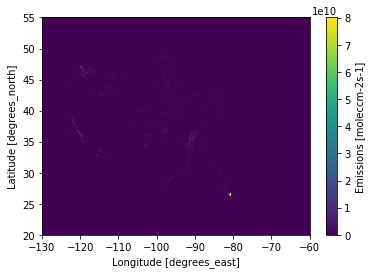

In [8]:
annual_dset['emissions_4F_Field_Burning'].plot()

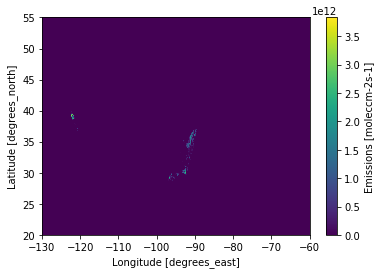

In [9]:
annual_dset['emissions_4C_Rice_Cultivation'].plot()

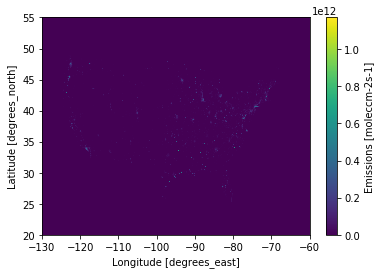

In [10]:
annual_dset['emissions_1A_Combustion_Stationary'].plot()

In [16]:
annual_df  = annual_dset.to_dataframe()
monthly_df = monthly_dset.to_dataframe()
daily_df   = daily_dset.to_dataframe()

In [12]:
print("Annual columns")
garbo = [print(c) for c in annual_df.columns]
print()

print("Monthly columns")
garbo = [print(c) for c in monthly_df.columns]
print()

print("Daily columns")
garbo = [print(c) for c in daily_df.columns]
print()

Annual columns
emissions_1A_Combustion_Mobile
emissions_1A_Combustion_Stationary
emissions_1B1a_Coal_Mining_Underground
emissions_1B1a_Coal_Mining_Surface
emissions_1B1a_Abandoned_Coal
emissions_1B2a_Petroleum
emissions_1B2b_Natural_Gas_Production
emissions_1B2b_Natural_Gas_Processing
emissions_1B2b_Natural_Gas_Transmission
emissions_1B2b_Natural_Gas_Distribution
emissions_2B5_Petrochemical_Production
emissions_2C2_Ferroalloy_Production
emissions_4A_Enteric_Fermentation
emissions_4B_Manure_Management
emissions_4C_Rice_Cultivation
emissions_4F_Field_Burning
emissions_5_Forest_Fires
emissions_6A_Landfills_Municipal
emissions_6A_Landfills_Industrial
emissions_6B_Wastewater_Treatment_Domestic
emissions_6B_Wastewater_Treatment_Industrial
emissions_6D_Composting

Monthly columns
emissions_1A_Combustion_Stationary
emissions_1B2a_Petroleum
emissions_1B2b_Natural_Gas_Production
emissions_4B_Manure_Management
emissions_4C_Rice_Cultivation
emissions_4F_Field_Burning

Daily columns
emissions_5_For

In [8]:
monthly_df.head()

emissions_1A_Combustion_Stationary  \
lat       lon         time                                       
20.049999 -129.949997 1.0                                  0.0   
                      2.0                                  0.0   
                      3.0                                  0.0   
                      4.0                                  0.0   
                      5.0                                  0.0   

                            emissions_1B2a_Petroleum  \
lat       lon         time                             
20.049999 -129.949997 1.0                        0.0   
                      2.0                        0.0   
                      3.0                        0.0   
                      4.0                        0.0   
                      5.0                        0.0   

                            emissions_1B2b_Natural_Gas_Production  \
lat       lon         time                                          
20.049999 -129.949997 1.0                                     0.0   
                      2.0                                     0.0   
                      3.0                                     0.0   
                      4.0                                     0.0   
                      5.0                                     0.0   

                            emissions_4B_Manure_Management  \
lat       lon         time                                   
20.049999 -129.949997 1.0                              0.0   
                      2.0                              0.0   
                      3.0                              0.0   
                      4.0                              0.0   
                      5.0                              0.0   

                            emissions_4C_Rice_Cultivation  \
lat       lon         time                                  
20.049999 -129.949997 1.0                             0.0   
                      2.0                             0.0   
                      3.0                             0.0   
                      4.0                             0.0   
                      5.0                             0.0   

                            emissions_4F_Field_Burning  
lat       lon         time                              
20.049999 -129.949997 1.0                          0.0  
                      2.0                          0.0  
                      3.0                          0.0  
                      4.0                          0.0  
                      5.0                          0.0

In [9]:
monthly_df_resetted = monthly_df.reset_index()
display(monthly_df_resetted.head())
monthly_df_resetted.describe()


,lat,lon,time,emissions_1A_Combustion_Stationary,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning
0,20.049999,-129.949997,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.049999,-129.949997,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.049999,-129.949997,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.049999,-129.949997,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.049999,-129.949997,5.0,0.0,0.0,0.0,0.0,0.0,0.0


,lat,lon,time,emissions_1A_Combustion_Stationary,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning
count,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06
mean,3.750000e+01,-9.500000e+01,6.500000e+00,1.309354e+09,1.078225e+10,2.162077e+10,1.286090e+10,2.267649e+09,5.499738e+07
std,1.010359e+01,2.020724e+01,3.452053e+00,1.292202e+10,1.565493e+11,2.369210e+11,9.757055e+10,5.577143e+10,1.094216e+09
min,2.005000e+01,-1.299500e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.875000e+01,-1.124750e+02,3.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.750000e+01,-9.500000e+01,6.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.625000e+01,-7.752500e+01,9.250000e+00,8.448149e+06,0.000000e+00,0.000000e+00,1.354389e+09,0.000000e+00,0.000000e+00
max,5.495000e+01,-6.005000e+01,1.200000e+01,1.179256e+12,3.763658e+13,2.015808e+13,1.361902e+13,5.481543e+12,4.510690e+11


In [10]:
monthly_df_resetted[monthly_df_resetted.columns[3:]]

,emissions_1A_Combustion_Stationary,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2939995,0.0,0.0,0.0,0.0,0.0,0.0
2939996,0.0,0.0,0.0,0.0,0.0,0.0
2939997,0.0,0.0,0.0,0.0,0.0,0.0
2939998,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
monthly_resetted_X = monthly_df_resetted[monthly_df_resetted.columns[3:]]
monthly_scaler = StandardScaler()
monthly_scaler.fit(monthly_resetted_X)
print(monthly_scaler.mean_)

monthly_resetted_stnd = monthly_scaler.transform(monthly_resetted_X)
monthly_clean = pd.DataFrame()
for d, col in zip(monthly_resetted_stnd.T, monthly_df_resetted.columns[3:]):
    monthly_clean[col] = d
    

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


[1.31101495e+09 1.07824127e+10 2.16209635e+10 1.28869173e+10
 2.26776956e+09 5.49974660e+07]


/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  


In [12]:
monthly_resetted_stnd_full = pd.merge(monthly_df_resetted[monthly_df_resetted.columns[:3]], monthly_clean, left_index=True, right_index=True, how='outer')
monthly_resetted_stnd_full.describe()

,lat,lon,time,emissions_1A_Combustion_Stationary,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning
count,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06,2.940000e+06
mean,3.750000e+01,-9.500000e+01,6.500000e+00,4.976834e-14,1.356659e-12,-3.941277e-13,-7.395399e-13,1.307755e-13,-3.036081e-13
std,1.010359e+01,2.020724e+01,3.452053e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.005000e+01,-1.299500e+02,1.000000e+00,-1.011306e-01,-6.875547e-02,-9.100969e-02,-1.315680e-01,-4.063728e-02,-5.021097e-02
25%,2.875000e+01,-1.124750e+02,3.750000e+00,-1.011306e-01,-6.875547e-02,-9.100969e-02,-1.315680e-01,-4.063728e-02,-5.021097e-02
50%,3.750000e+01,-9.500000e+01,6.500000e+00,-1.011306e-01,-6.875547e-02,-9.100969e-02,-1.315680e-01,-4.063728e-02,-5.021097e-02
75%,4.625000e+01,-7.752500e+01,9.250000e+00,-1.004790e-01,-6.875547e-02,-9.100969e-02,-1.177404e-01,-4.063728e-02,-5.021097e-02
max,5.495000e+01,-6.005000e+01,1.200000e+01,9.086575e+01,2.399258e+02,8.476093e+01,1.389107e+02,9.818582e+01,4.117617e+02


In [13]:
sns.countplot(monthly_resetted_stnd_full, x='time')

TypeError: countplot() got multiple values for argument 'x'

In [ ]:
# YOUR CODE HERE

plt.figure(figsize=(8,6))
colors = sns.cubehelix_palette(12)

for i in range(1,13):
    sns.distplot(1/monthly_resetted_stnd_full[monthly_resetted_stnd_full['time']==i]["emissions_1A_Combustion_Stationary"], label='Month {i}'.format(i=i), color=colors[i-1])

plt.legend()
plt.title("emissions_1A_Combustion_Stationary in 2012")
plt.xlabel("Ch4 Emissions")
plt.ylabel("Density")
plt.show()

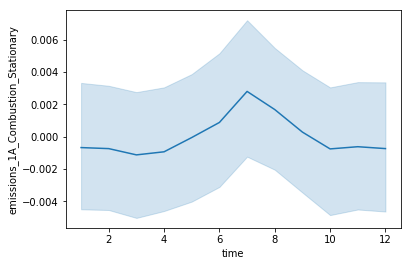

In [15]:
sns.lineplot(data=monthly_resetted_stnd_full, x='time', y='emissions_1A_Combustion_Stationary')

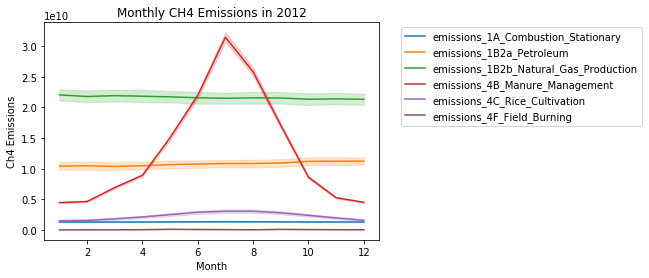

In [25]:
for col in monthly_df_resetted.columns[3:]:
    sns.lineplot(data=monthly_df_resetted, x='time', y=col, label=col)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Monthly CH4 Emissions in 2012")
plt.xlabel("Month")
plt.ylabel("Ch4 Emissions")
plt.show()

In [22]:
daily_df_resetted = daily_df.reset_index()
daily_df_resetted.head()

,lat,lon,time,emissions_5_Forest_Fires
0,20.049999,-129.949997,1.0,0.0
1,20.049999,-129.949997,2.0,0.0
2,20.049999,-129.949997,3.0,0.0
3,20.049999,-129.949997,4.0,0.0
4,20.049999,-129.949997,5.0,0.0


KeyboardInterrupt: 

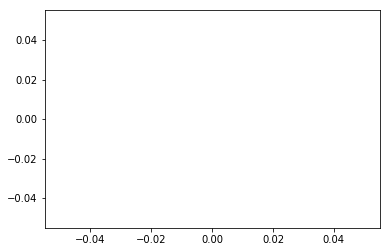

In [43]:
for col in daily_df_resetted.columns[3:]:
    sns.lineplot(data=daily_df_resetted, x='time', y=col, label=col)

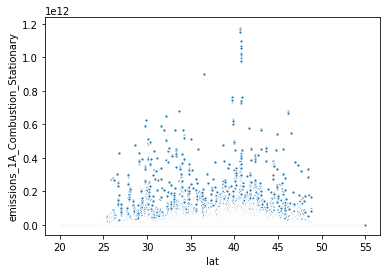

In [47]:
sns.scatterplot(data=monthly_df_resetted,  x='lat', y='emissions_1A_Combustion_Stationary', marker='.')

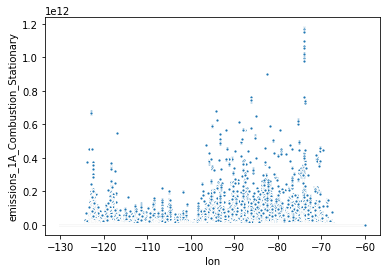

In [46]:
sns.scatterplot(data=monthly_df_resetted,  x='lon', y='emissions_1A_Combustion_Stationary', marker='.')

In [56]:
annnual_df_resetted = annual_df.reset_index()
display(annnual_df_resetted.head())
annnual_df_resetted.describe()


,lat,lon,emissions_1A_Combustion_Mobile,emissions_1A_Combustion_Stationary,emissions_1B1a_Coal_Mining_Underground,emissions_1B1a_Coal_Mining_Surface,emissions_1B1a_Abandoned_Coal,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_1B2b_Natural_Gas_Processing,...,emissions_4A_Enteric_Fermentation,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning,emissions_5_Forest_Fires,emissions_6A_Landfills_Municipal,emissions_6A_Landfills_Industrial,emissions_6B_Wastewater_Treatment_Domestic,emissions_6B_Wastewater_Treatment_Industrial,emissions_6D_Composting
0,20.049999,-129.949997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.049999,-129.849991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.049999,-129.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.049999,-129.649994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.049999,-129.550003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,lat,lon,emissions_1A_Combustion_Mobile,emissions_1A_Combustion_Stationary,emissions_1B1a_Coal_Mining_Underground,emissions_1B1a_Coal_Mining_Surface,emissions_1B1a_Abandoned_Coal,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_1B2b_Natural_Gas_Processing,...,emissions_4A_Enteric_Fermentation,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning,emissions_5_Forest_Fires,emissions_6A_Landfills_Municipal,emissions_6A_Landfills_Industrial,emissions_6B_Wastewater_Treatment_Domestic,emissions_6B_Wastewater_Treatment_Industrial,emissions_6D_Composting
count,245000.000000,245000.000000,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,...,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05,2.450000e+05
mean,37.499999,-94.999998,4.163674e+08,1.310981e+09,1.080547e+10,2.614817e+09,1.253254e+09,1.078352e+10,2.162056e+10,4.151343e+09,...,3.378463e+10,1.292735e+10,2.267772e+09,5.497211e+07,2.272147e+09,2.455484e+10,2.966131e+09,1.772586e+09,1.141088e+09,3.745845e+08
std,10.103609,20.207280,2.440598e+09,1.293170e+10,7.744701e+11,3.092548e+11,4.099757e+10,1.541039e+11,2.357008e+11,2.905283e+11,...,9.780672e+10,7.928922e+10,5.409315e+10,6.092918e+08,3.057555e+10,4.749043e+11,1.139232e+11,5.036844e+10,2.622941e+11,7.679250e+09
min,20.049999,-129.949997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,28.749998,-112.474997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,37.499998,-94.999996,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,46.250000,-77.524996,1.312645e+08,8.448390e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.178796e+10,1.843289e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,54.949997,-60.049999,1.126810e+11,1.169998e+12,2.022635e+14,1.002466e+14,9.016389e+12,2.822079e+13,1.946002e+13,9.638674e+13,...,4.544787e+12,4.642802e+12,3.832788e+12,8.007884e+10,2.303982e+12,6.754464e+13,2.497766e+13,9.190181e+12,1.283752e+14,7.718225e+11


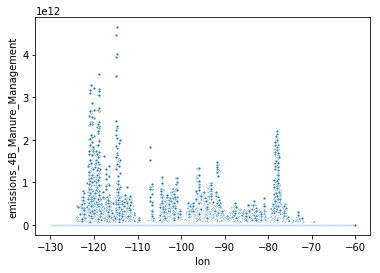

In [59]:
sns.scatterplot(data=annnual_df_resetted,  x='lon', y='emissions_4B_Manure_Management', marker='.')

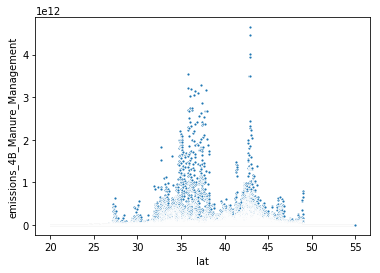

In [60]:
sns.scatterplot(data=annnual_df_resetted,  x='lat', y='emissions_4B_Manure_Management', marker='.')

In [21]:
annual_df.sample(5)

,,emissions_1A_Combustion_Mobile,emissions_1A_Combustion_Stationary,emissions_1B1a_Coal_Mining_Underground,emissions_1B1a_Coal_Mining_Surface,emissions_1B1a_Abandoned_Coal,emissions_1B2a_Petroleum,emissions_1B2b_Natural_Gas_Production,emissions_1B2b_Natural_Gas_Processing,emissions_1B2b_Natural_Gas_Transmission,emissions_1B2b_Natural_Gas_Distribution,...,emissions_4A_Enteric_Fermentation,emissions_4B_Manure_Management,emissions_4C_Rice_Cultivation,emissions_4F_Field_Burning,emissions_5_Forest_Fires,emissions_6A_Landfills_Municipal,emissions_6A_Landfills_Industrial,emissions_6B_Wastewater_Treatment_Domestic,emissions_6B_Wastewater_Treatment_Industrial,emissions_6D_Composting
lat,lon,,,,,,,,,,,,,,,,,,,,,
31.549999,-97.449997,1.437174e+09,2.318726e+08,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,4.479023e+09,2.784972e+09,...,1.898916e+11,4.209471e+10,0.0,90478440.0,287177824.0,0.0,0.0,3.267723e+09,0.0,0.0
30.349998,-61.349998,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
41.849998,-107.750000,2.353323e+03,1.205080e+05,0.0,0.0,0.0,2.957010e+10,2.700613e+10,0.0,1.681883e+09,7.672551e+05,...,7.439400e+09,4.152272e+08,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
35.549999,-111.150002,2.119393e+05,2.555484e+06,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,7.715454e+06,...,8.712788e+09,6.943190e+08,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
49.949997,-81.750000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
